# **Capstone Project 3**

Created by : Rafdiaufar Hazman

## **Business Problem Understanding**

**Context**

A travel insurance company mainly generates income by collecting premiums from policyholders in exchange for providing coverage against various risks associated with travel, such as trip cancellation, medical emergencies, lost luggage, and other unforeseen events. Another source of income is by earning underwriting profit, where the amount of premiums collected exceeds the amount paid out in claims and operating expenses. Company wants to know the policyholder who will submit an insurance claim for coverage. Policyholder data at insurance companies is historical data consisting of destinations, insurance products, and so on.

Target :
- 0 : Will not submit insurance claim
- 1 : Will submit insurance claim

**Problem Statement**

The travel insurance company is still having trouble in accurately predicting which customers are likely to file claims during their trips. If the company accept all customer without any consideration, the company may attracts more higher-risk customers than lower-risk customers, resulting in increased claims payouts. But if the customer selection is too tight, the company may let go lower-risk customers that have lower chance to claim payouts, thus decreasing the company profits.

**Goals**

From that problem, company wants to develop a new prediction method that are able to predict which customer will claim insurance and customer that won't claim insurance.

Company also wanted to know what are the factors that leads the customer to claim insurance in order to effectively allocate resources, set appropriate premiums, and managing risks.

**Analytic Approach**

Therefore, what we will be doing is analyzing historical data for the company to find the pattern and behaviour that differentiate customer who will claim their insurance and customer who won't claim.

Then, we will create a classification model that can help the company to predict which customers is more likely to issue a claim.

**Metric Evaluation**

Type 1 Error : False Positive (Customer are predicted to claim the insurance but in actual, the customer does not claim the insurance)
- Loss of profit for not accepting potential low risk customer.

Type 2 Error : False Negative (Customer are predicted not claiming insurance but in actual, the customer does claim the insurance)
- Unexpected loss of profit because of paying out customer claims.
- Increased claims payout from higher risk customer which results in company having a loss from claims.

Based on the consequences, the company will suffer more losses from paying out high risk customer claims. But, if the we only focus on the False Negative error, the company will be losing too much potential low risk customer. Therefore, since we want to predict the positive class while lowering the error for both false negative and false positive with emphasises on false negative, we will be using the **f2** metrics.

## **Data Understanding**

Note :
- Imbalanced Datasets
- Feature mostly belongs to categorical type with some numerical data.
- Each row represent one policyholder who had used the company services.

Feature Information

| Feature | Data Type, Length | Description |
| --- | ---| --- |
| Agency | Text | Name of Agency |
| Agency Type | Text | Type of travel insurance agencies |
| Distribution Channel | Text | Channel of travel insurance agencies |
| Product Name | Text | Name of the travel insurance products |
| Gender | Text | Gender of insured |
| Duration | Integer | Duration of travel |
| Destination | Text | Destination of travel |
| Net Sales | Float | Amount of sales of travel insurance policies |
| Commission (in value) | Float | Commission received for travel insurance agency |
| Age | Integer | Age of insured |
| Claim | Text | Claim Status. 0 - Not Claimed, 1 - Claimed |

### **Import Library & Dataset**

In [1]:
# Import Library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Splitting
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Missing Values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Modelling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# ensemble similar
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble various
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics Evaluation
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Target column proportion will be checked to see if this dataset is imbalanced or not.

In [5]:
df['Claim'].value_counts()

Claim
No     43651
Yes      677
Name: count, dtype: int64

In [6]:
df['Claim'].value_counts() / len(df)

Claim
No     0.984727
Yes    0.015273
Name: count, dtype: float64

Based on the target column result, this dataset is highly imbalanced with a ratio of 98 : 1. Since the target is imbalanced, we will be using resampling method for our modeling later to treat imbalanced target.

### **Dataset Checking**

In [7]:
pd.DataFrame({
    'Dtype': df.dtypes,
    'Null': df.isna().sum().values,
    'Negative': [len(df[col][df[col] < 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Zero(0)': [len(df[col][df[col] == 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Duplicate' : df.duplicated().sum(),
    'Nunique': df.nunique(dropna=False).values,
    'Unique': [df[col].unique() for col in df.columns]}
).round(2)

,Dtype,Null,Negative,Zero(0),Duplicate,Nunique,Unique
Agency,object,0,0,0,4667,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
Agency Type,object,0,0,0,4667,2,"[Airlines, Travel Agency]"
Distribution Channel,object,0,0,0,4667,2,"[Online, Offline]"
Product Name,object,0,0,0,4667,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
Gender,object,31647,0,0,4667,3,"[F, nan, M]"
Duration,int64,0,2,47,4667,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
Destination,object,0,0,0,4667,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
Net Sales,float64,0,483,1291,4667,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
Commision (in value),float64,0,0,24725,4667,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
Age,int64,0,0,2,4667,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."


Based on above results, there are some features that needs to be cleaned. Therefore, in the following section, we will focus on cleaning the data before moving on to analysis and model creation for machine learning.

## **Data Cleaning**

### **Null Value**

**Gender**

First, we will consider to drop `Gender` feature from our data, because more than 50% of its row are null values. We also have no way to fill it because there is no direct correlation based on other features.

Additionally, `Gender` doesn't have any significance impact for Travel Insurance claims based on domain knowledge.

We will be checking their proportion to the target as a confirmation before dropping the data.

In [8]:
df['Gender'].value_counts(dropna=False)

Gender
NaN    31647
M       6504
F       6177
Name: count, dtype: int64

In [9]:
df.groupby('Gender', dropna=False)['Claim'].value_counts().unstack()

Claim,No,Yes
Gender,,
F,5923,254
M,6283,221
NaN,31445,202


In [10]:
df.groupby('Gender', dropna=False)['Claim'].value_counts(normalize=True).unstack()

Claim,No,Yes
Gender,,
F,0.958880,0.041120
M,0.966021,0.033979
NaN,0.993617,0.006383


According to the result above without handling the NaN value, Female has higher proportion of Yes target than other category, but NaN value has the highest amount of data that can be either Female or Male which makes the result unreliable. Based on this, it is better to remove the feature altogether in order not to create a bias, since we also have no way to fill the NaN value accurately.

In [11]:
df.drop(columns='Gender', inplace=True)

After removing `Gender`, we will continue cleaning the data by removing duplicates from the datasets.

### **Duplicate Value**

In [12]:
df[df.duplicated(keep=False) == True].sort_values(by='Age')

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
7886,TTW,Travel Agency,Offline,Child Comprehensive Plan,369,SINGAPORE,74.0,0.0,9,No
2008,TTW,Travel Agency,Offline,Child Comprehensive Plan,369,SINGAPORE,74.0,0.0,9,No
29883,RAB,Airlines,Online,Value Plan,208,BRUNEI DARUSSALAM,23.0,9.2,18,No
29063,RAB,Airlines,Online,Value Plan,208,BRUNEI DARUSSALAM,23.0,9.2,18,No
32147,EPX,Travel Agency,Online,Cancellation Plan,21,SINGAPORE,10.0,0.0,20,No
...,...,...,...,...,...,...,...,...,...,...
4462,JWT,Airlines,Online,Value Plan,49,INDIA,31.0,12.4,118,No
1594,JWT,Airlines,Online,Value Plan,15,INDIA,39.0,15.6,118,No
26852,JWT,Airlines,Online,Value Plan,14,INDIA,39.0,15.6,118,No
7496,JWT,Airlines,Online,Value Plan,16,INDIA,31.0,12.4,118,No


In [13]:
df.duplicated().sum()

5004

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(39324, 10)

In [16]:
df['Claim'].value_counts()

Claim
No     38651
Yes      673
Name: count, dtype: int64

In [17]:
df['Claim'].value_counts() / len(df)

Claim
No     0.982886
Yes    0.017114
Name: count, dtype: float64

After dropping the duplicates, the distribution of target column is still the same. This mean, there is no problem with removing the duplicates.

In [18]:
pd.DataFrame({
    'Dtype': df.dtypes,
    'Null': df.isna().sum().values,
    'Negative': [len(df[col][df[col] < 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Zero(0)': [len(df[col][df[col] == 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Duplicate' : df.duplicated().sum(),
    'Nunique': df.nunique(dropna=False).values,
    'Unique': [df[col].unique() for col in df.columns]}
).round(2)

,Dtype,Null,Negative,Zero(0),Duplicate,Nunique,Unique
Agency,object,0,0,0,0,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
Agency Type,object,0,0,0,0,2,"[Airlines, Travel Agency]"
Distribution Channel,object,0,0,0,0,2,"[Online, Offline]"
Product Name,object,0,0,0,0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
Duration,int64,0,2,34,0,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
Destination,object,0,0,0,0,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
Net Sales,float64,0,478,1248,0,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
Commision (in value),float64,0,0,21056,0,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
Age,int64,0,0,2,0,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."
Claim,object,0,0,0,0,2,"[No, Yes]"


Now that there is no Null and Duplicates anymore, we will check for anomaly within the data, especially those features that have zero or negative values.

### **Data Anomaly & Outliers**

**Duration**

Based on the data information, This feature explains the duration of the travels in days. Therefore it doesn't make sense if the travel days is in negative. We will remove the negative value on `Duration`.

In [19]:
df[df['Duration'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


In [20]:
df.drop(index=df[df['Duration'] < 0].index, inplace=True)

Now that we have removed the negative value, we will be checking the distribution of data for `Duration` to check if there is any outliers within the feature.

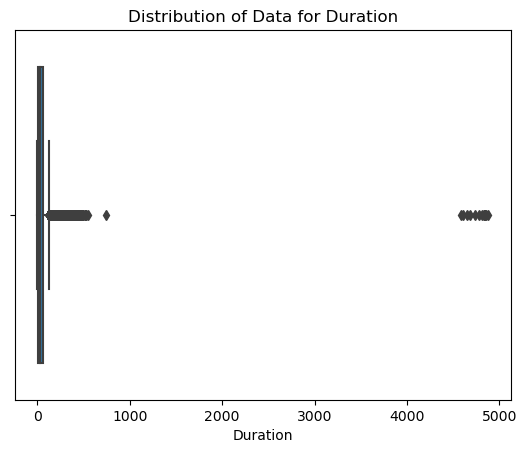

In [21]:
plt.title('Distribution of Data for Duration')
sns.boxplot(data=df, x='Duration');


Based on the above boxplot, there are extreme outliers found on `Duration`. Since `Duration` feature are based on the number of travel days, it doesn't make sense for a travel having more than ten years (3650 days) duration. Hence, this outliers will be removed from the dataset.

In [22]:
df[df['Duration'] > 3650]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
4678,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No
10172,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,No
12140,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,48,No
19497,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,No
20038,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
22215,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,No
25606,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,48,No
28032,SSI,Airlines,Online,Ticket Protector,4829,SINGAPORE,0.32,0.09,48,No
37207,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,No


In [23]:
df.drop(index=df[df['Duration'] > 3650].index, inplace=True)

After removing outliers, we will continue checking for `Duration` feature with 0 values.

In [24]:
df[df['Duration'] == 0].head(15)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
242,JZI,Airlines,Online,Basic Plan,0,CHINA,22.00,7.70,34,No
1782,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,1.80,0.50,48,No
1853,JWT,Airlines,Online,Value Plan,0,INDIA,62.00,24.80,118,No
2558,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,9.77,2.74,48,No
3236,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,0,INDIA,35.25,22.91,24,No
3406,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,2.86,0.80,48,No
3549,JZI,Airlines,Online,Basic Plan,0,VIET NAM,18.00,6.30,58,No
3591,JZI,Airlines,Online,Basic Plan,0,MYANMAR,18.00,6.30,26,No
3753,JWT,Airlines,Online,Value Plan,0,INDIA,31.00,12.40,118,No
4939,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,UNITED STATES,9.90,5.94,59,No


In [25]:
print('Row, Column for Travel with Duration 0', df[df['Duration'] == 0].shape)
print('Row, Column for Travel with Duration 1', df[df['Duration'] == 1].shape)

Row, Column for Travel with Duration 0 (34, 10)
Row, Column for Travel with Duration 1 (381, 10)


Assuming that duration 0 means less than a day trip. We will check if there is any difference of proportion claim between duration 0 trip and duration 1 trip.

In [26]:
df[df['Duration'] == 1]['Claim'].value_counts()

Claim
No    381
Name: count, dtype: int64

In [27]:
df[df['Duration'] == 0]['Claim'].value_counts()

Claim
No    34
Name: count, dtype: int64

Since there is no difference of claim proportion between 0 day trip and 1 day trip, we will change 0 value to 1 for `Duration` as a 1 day trip.

In [28]:
df.loc[df['Duration'] == 0, 'Duration'] = 1

**Net Sales**

In [29]:
pd.DataFrame({
    'Dtype': df.dtypes,
    'Null': df.isna().sum().values,
    'Negative': [len(df[col][df[col] < 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Zero(0)': [len(df[col][df[col] == 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Duplicate' : df.duplicated().sum(),
    'Nunique': df.nunique(dropna=False).values,
    'Unique': [df[col].unique() for col in df.columns]}
).round(2)

,Dtype,Null,Negative,Zero(0),Duplicate,Nunique,Unique
Agency,object,0,0,0,3,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, ..."
Agency Type,object,0,0,0,3,2,"[Airlines, Travel Agency]"
Distribution Channel,object,0,0,0,3,2,"[Online, Offline]"
Product Name,object,0,0,0,3,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
Duration,int64,0,0,0,3,422,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
Destination,object,0,0,0,3,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
Net Sales,float64,0,478,1248,3,1004,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
Commision (in value),float64,0,0,21056,3,913,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
Age,int64,0,0,2,3,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."
Claim,object,0,0,0,3,2,"[No, Yes]"


Moving on to `Net Sales`, we have a negative value for a total of 478 rows. Upon closer check, there are multiple duplicate rows where the only difference between them is the positive value and negative value of `Net Sales`. Therefore, we will be changing the `Net Sales` value into a positive value then remove all of the duplicates.

In [30]:
df.loc[df['Net Sales'] < 0, 'Net Sales'] = abs(df.loc[df['Net Sales'] < 0, 'Net Sales'])

In [31]:
df.duplicated().sum()

290

In [32]:
df.drop_duplicates(inplace=True)

In case of 0 values in `Net Sales`, there are cases where `Net Sales` are 0, but `Commision (in value)` is higher than 0.

In [33]:
df[df['Net Sales'] == 0].head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
45,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,24,UNITED ARAB EMIRATES,0.0,23.76,27,No
60,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,14,AUSTRALIA,0.0,17.82,31,No
63,EPX,Travel Agency,Online,Cancellation Plan,100,UNITED STATES,0.0,0.00,37,No
75,C2B,Airlines,Online,Silver Plan,23,SINGAPORE,0.0,5.63,25,No
78,EPX,Travel Agency,Online,Cancellation Plan,73,BELGIUM,0.0,0.00,36,No


In [34]:
df[(df['Net Sales'] == 0) & (df['Commision (in value)'] > 0)].head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
45,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,24,UNITED ARAB EMIRATES,0.0,23.76,27,No
60,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,14,AUSTRALIA,0.0,17.82,31,No
75,C2B,Airlines,Online,Silver Plan,23,SINGAPORE,0.0,5.63,25,No
125,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,95,NETHERLANDS,0.0,5.94,31,No
201,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,5,MALAYSIA,0.0,23.76,41,No


In this case, the company might be earning commision from service fees, consulting services, or a third-party booking which doesn't leads to a direct sales. Therefore, we won't be cleaning the data.

**Commision (in value)**

There are some 0 values on commision feature. In this case, this might be caused by different policies that the travel insurance company has for their products.

In [35]:
df[df['Commision (in value)'] == 0]['Product Name'].value_counts()

Product Name
Cancellation Plan                       10964
2 way Comprehensive Plan                 8099
1 way Comprehensive Plan                 1843
Individual Comprehensive Plan              46
Spouse or Parents Comprehensive Plan       13
Child Comprehensive Plan                    7
Name: count, dtype: int64

In [36]:
df['Product Name'].value_counts()

Product Name
Cancellation Plan                       10964
2 way Comprehensive Plan                 8099
Rental Vehicle Excess Insurance          5572
Basic Plan                               3628
Bronze Plan                              2627
1 way Comprehensive Plan                 1843
Value Plan                               1536
Silver Plan                              1477
Annual Silver Plan                        843
Ticket Protector                          696
Travel Cruise Protect                     326
Comprehensive Plan                        239
Gold Plan                                 234
24 Protect                                168
Annual Gold Plan                          135
Single Trip Travel Protect Gold           133
Single Trip Travel Protect Silver         116
Premier Plan                              114
Annual Travel Protect Gold                 62
Annual Travel Protect Silver               59
Single Trip Travel Protect Platinum        47
Individual Comprehens

Upon closer look, six different plans always have their commision at 0. This means, when selling those six plans, the company won't take any commision fees from the customers. Therefore, we will be keeping those number as it is.

**Age**

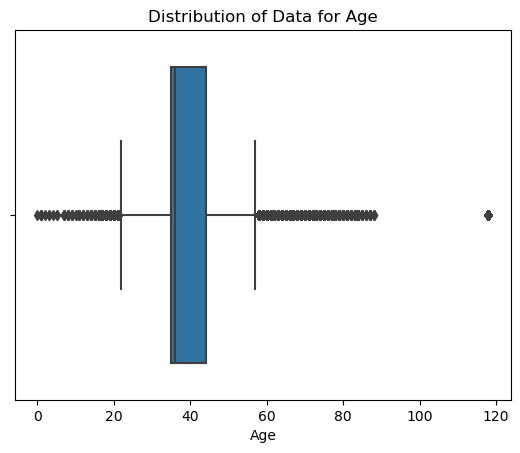

In [37]:
sns.boxplot(data=df, x='Age')
plt.title('Distribution of Data for Age');

In [38]:
df[df['Age'] == 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
37815,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.5,0,No


For `Age` with 0 value, the customer might be a baby with less than 1 years old. Therefore we will be keepting those values. 

There are also some extreme outliers for `Age` with above 100. Since according to [worlddata]('https://www.worlddata.info/life-expectancy') the average life expectancy is around 70, we will be removing data with age above 100.

In [39]:
df[df['Age'] > 100]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
43838,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,No
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No


In [40]:
df.drop(index=df[df['Age'] > 100].index, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38607 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                38607 non-null  object 
 1   Agency Type           38607 non-null  object 
 2   Distribution Channel  38607 non-null  object 
 3   Product Name          38607 non-null  object 
 4   Duration              38607 non-null  int64  
 5   Destination           38607 non-null  object 
 6   Net Sales             38607 non-null  float64
 7   Commision (in value)  38607 non-null  float64
 8   Age                   38607 non-null  int64  
 9   Claim                 38607 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.2+ MB


In [42]:
pd.DataFrame({
    'Dtype': df.dtypes,
    'Null': df.isna().sum().values,
    'Negative': [len(df[col][df[col] < 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Zero(0)': [len(df[col][df[col] == 0].values) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'Duplicate' : df.duplicated().sum(),
    'Nunique': df.nunique(dropna=False).values,
    'Unique': [df[col].unique() for col in df.columns]}
).round(2)

,Dtype,Null,Negative,Zero(0),Duplicate,Nunique,Unique
Agency,object,0,0,0,0,15,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, ..."
Agency Type,object,0,0,0,0,2,"[Airlines, Travel Agency]"
Distribution Channel,object,0,0,0,0,2,"[Online, Offline]"
Product Name,object,0,0,0,0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
Duration,int64,0,0,0,0,422,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
Destination,object,0,0,0,0,136,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
Net Sales,float64,0,0,1237,0,870,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
Commision (in value),float64,0,0,20943,0,884,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
Age,int64,0,0,1,0,88,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."
Claim,object,0,0,0,0,2,"[No, Yes]"


Now that we have gone through each feature with problems, we will continue analyzing the data for our problems.

## **Data Analysis**

In this section, we will analyze each features within the dataset in order to see if the features have an impact to the target columns.

### **Numerical Features**

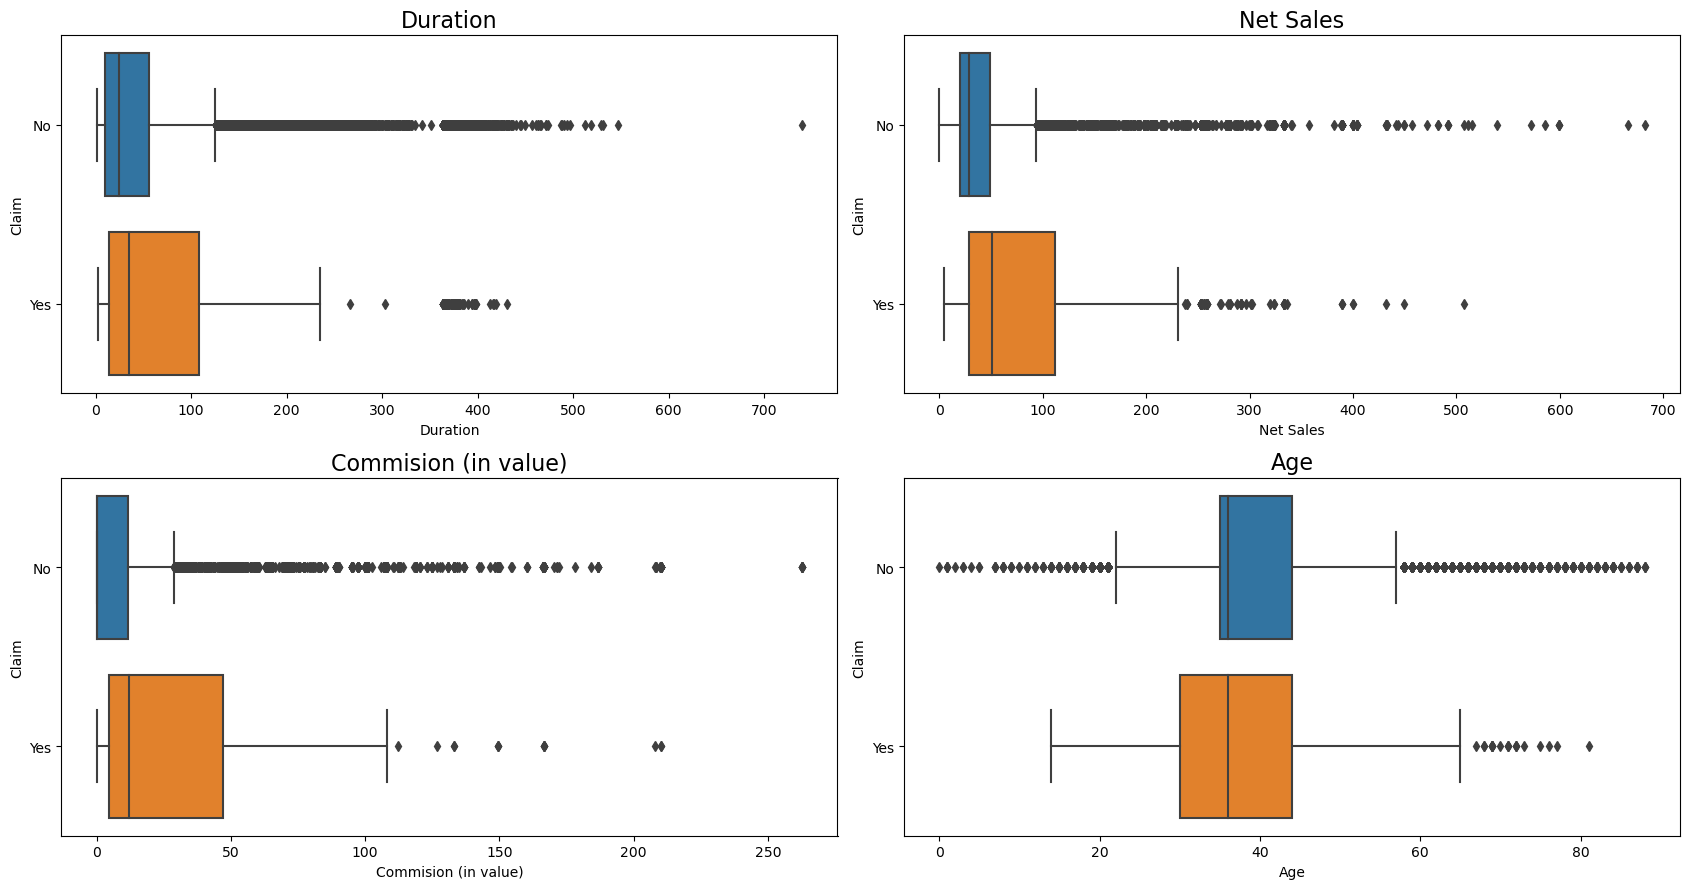

In [43]:
num_feature = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(17,9))
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(x=feature, data=df, y='Claim')
    plt.title(feature, fontsize= 16)
    plt.tight_layout()
    plotnumber += 1

plt.show();

Based on above boxplots, we can conclude that there is a difference between distribution of `Duration` from target features, where customers are more likely issues a claim if the travel `Duration` is longer.

This trend is also the same for `Net Sales` and `Commision (in value)` features, that customer are more likely issues a claim if those features has higher value.

However, for `Age` feature, while there are differences on the distribution of data, their median is close enough that this might implied that `Age` might not be a factor for customer to claim insurance.

### **Categorical Data**

In [44]:
for i in df.drop(columns=['Duration', 'Net Sales', 'Commision (in value)', 'Age','Claim']):
    category_df = df.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(category_df.sort_values(by=['Yes'], ascending=False))

Claim,No,Yes
Agency,,
C2B,0.924191,0.075809
LWC,0.935698,0.064302
KML,0.978166,0.021834
TTW,0.984848,0.015152
CBH,0.985075,0.014925
CSR,0.985294,0.014706
CWT,0.988512,0.011488
CCR,0.989474,0.010526
SSI,0.992764,0.007236


Claim,No,Yes
Agency Type,,
Airlines,0.960126,0.039874
Travel Agency,0.991546,0.008454


Claim,No,Yes
Distribution Channel,,
Online,0.982664,0.017336
Offline,0.987730,0.012270


Claim,No,Yes
Product Name,,
Annual Silver Plan,0.873072,0.126928
Annual Gold Plan,0.881481,0.118519
Annual Travel Protect Gold,0.887097,0.112903
Single Trip Travel Protect Platinum,0.893617,0.106383
Spouse or Parents Comprehensive Plan,0.923077,0.076923
Silver Plan,0.926879,0.073121
Annual Travel Protect Silver,0.932203,0.067797
Bronze Plan,0.939094,0.060906
Annual Travel Protect Platinum,0.941176,0.058824


Claim,No,Yes
Destination,,
COSTA RICA,0.750000,0.250000
SINGAPORE,0.948708,0.051292
CZECH REPUBLIC,0.953488,0.046512
ICELAND,0.961039,0.038961
ISRAEL,0.968750,0.031250
...,...,...
UZBEKISTAN,1.000000,NaN
VANUATU,1.000000,NaN
VENEZUELA,1.000000,NaN


The above tables explains about the distribution of data between categorical features and the target columns. Based on the above results, there are several insight that can be taken:

- `Agency` has an impact toward the target, where customers from a certain agency will have higher chance to issues a claim than other agency.
- According to the proportion of claims within `Agency Type`, customer will have higher chance to issues a claim if the agency was an airline agency.
- `Distribution Channel` doesn't have any impact toward the target. The proportion value to target within the feature is the same.
- `Product Name` feature is also affecting the proportion of claims. It can be seen that most of the claims comes from customer using the Annual Plan Product.
- According to their travel `Destination`, there are some destination where customer are more likely to issues a claim than other destination.

## **Data Preparation**

### **Preprocessing**

After analyzing through each feature, in this section, we will be preprocessing our data for modeling purpose. Below is the summary of what we will be doing in this section:

1. Changing `Claim` columns value into 1 for claim and 0 for not claim, to set it as the target of machine learning model.
1. Changing `Agency`, `Product Name` and `Destination` columns using Binary Encoding, because there are many unique data and the feature doesn't have any specific order.
1. Changing `Agency Type` and `Distribution Channel` columns using One Hot Encoding, because the number of unique data is small and doesn't have any specific order.
1. Changing `Duration`, `Net Sales`, `Commision (in value)`, and `Age` using Robust Scaler to normalize data used for machine learning, because these are numerical columns that doesn't have normal distribution.

In [45]:
df['Claim'] = np.where(df['Claim'] == 'Yes', 1, 0)

In [46]:
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Agency', 'Product Name', 'Destination']),
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel']),
    ('robust', RobustScaler(), ['Duration', 'Net Sales', 'Commision (in value)', 'Age'])
], remainder='passthrough')

In [47]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('robust', RobustScaler(),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)', 'Age'])])

### **Define X and y**

After preprocessing the data, we will be creating both of the features dataframe and the target for modeling purpose.

In [48]:
X = df.drop(columns=['Claim'])
y = df['Claim']

### **Train, Test, Split**

Then, the data will be splitted between train set and test set, for training the model and the latter for testing the model to predict the results.

In this notebook, we will be splitting it into 80% of overall data for train set and 20% of overall data for test set.

We will also use `stratify = y` to evenly split the portion of class 1 and class 0 target value to each sets in order for the model to learn better.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## **Modeling**

In this section, we will start modeling the data in order to answer the business problem. Which is predicting which customers will claim their travel insurance.

In order to that, we will first need to find the best model that can depict our dataset. We will be using Cross Validation method to see which model has the highest score for our selected metrics which is f2 score.

### **Cross Validation K-Fold**

**Create F2 Score**

Before doing the cross validation, we will be creating the f2 scoring for modeling purpose.

The different between f1 score and f2 scores lies in the emphasises toward recall value. While both score tried to balance having high value in both precision and recall, f2 score will favor recall over precision. Thus, lowering the risk of False Negative while still maintaining a low False Positive Value.

In [50]:
from sklearn.metrics import make_scorer, fbeta_score

In [51]:
## Define f2 score
f2 = make_scorer(fbeta_score, beta=2)

After creating the f2 score, we will then start doing the cross validation.

The cross validation will be done using `StratifiedKFold` method in order to have a balanced proportion of class 0 and class 1 value for the target. 

In [52]:
# define models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
adab = AdaBoostClassifier(random_state=0)
gradb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier()


In [53]:
# define voting
voting = VotingClassifier(estimators=[('clf1', logreg),
                             ('clf2', knn),
                             ('clf3', tree)],
                             voting='soft') # base learner

# define stacking
stacking = StackingClassifier(estimators=[('clf1', logreg),
                                         ('clf2', knn),
                                         ('clf3', tree)], # base learner
                                         final_estimator=logreg) # meta learner

In [54]:
# Cross Validation
list_algo = [logreg, knn, tree, rf, adab, gradb, xgb, voting, stacking]
cv_score = []
cv_mean = []
cv_std = []

for algo in list_algo:
    # define model
    model = algo
    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # cross validation 
    cross_val = cross_val_score(
        estimator= pipe_prep_model,
        X= X_train,
        y= y_train,
        cv= StratifiedKFold(n_splits=5),
        n_jobs=-1,
        scoring=f2)
    
    # recall
    cv_score.append(cross_val.round(2))
    cv_mean.append(cross_val.mean())
    cv_std.append(cross_val.std())

In [55]:
df_f2 = pd.DataFrame()
df_f2['algo'] = list_algo
df_f2['all_score'] = cv_score
df_f2['mean_score'] = cv_mean
df_f2['std_score'] = cv_std
df_f2

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=0),"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
1,KNeighborsClassifier(),"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
2,DecisionTreeClassifier(random_state=0),"[0.08, 0.05, 0.04, 0.08, 0.06]",0.063808,0.013955
3,RandomForestClassifier(random_state=0),"[0.01, 0.01, 0.02, 0.01, 0.0]",0.011181,0.007075
4,AdaBoostClassifier(random_state=0),"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
5,GradientBoostingClassifier(random_state=0),"[0.01, 0.0, 0.01, 0.0, 0.01]",0.006983,0.005702
6,"XGBClassifier(base_score=None, booster=None, c...","[0.0, 0.0, 0.0, 0.01, 0.0]",0.002288,0.004577
7,"VotingClassifier(estimators=[('clf1', Logistic...","[0.01, 0.0, 0.01, 0.0, 0.02]",0.009186,0.008544
8,"StackingClassifier(estimators=[('clf1', Logist...","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000


According to the result, all of the cross validation score is low which might be caused by the imbalanced data. Therefore we will need to resample the data before doing another cross validation. We will try to use various method of resampling to see which model has the highest score.

In [56]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

#### **RandomOverSampler**

In [57]:
# Cross Validation
list_algo = [logreg, knn, tree, rf, adab, gradb, xgb, voting, stacking]
cv_score = []
cv_mean = []
cv_std = []

for algo in list_algo:
    # define model
    model = algo

    # define resampler
    resampler = RandomOverSampler(random_state=0)

    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('resampling', resampler),
        ('modeling', model)
    ])

    # cross validation 
    cross_val = cross_val_score(
        estimator= pipe_prep_model,
        X= X_train,
        y= y_train,
        cv= StratifiedKFold(n_splits=5),
        n_jobs=-1,
        scoring=f2)
    
    # recall
    cv_score.append(cross_val.round(2))
    cv_mean.append(cross_val.mean())
    cv_std.append(cross_val.std())

In [58]:
df_f2 = pd.DataFrame()
df_f2['algo'] = list_algo
df_f2['all_score'] = cv_score
df_f2['mean_score'] = cv_mean
df_f2['std_score'] = cv_std
df_f2

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=0),"[0.21, 0.24, 0.22, 0.24, 0.22]",0.226355,0.010584
1,KNeighborsClassifier(),"[0.15, 0.12, 0.13, 0.12, 0.14]",0.130194,0.011581
2,DecisionTreeClassifier(random_state=0),"[0.06, 0.06, 0.07, 0.05, 0.07]",0.060812,0.007391
3,RandomForestClassifier(random_state=0),"[0.04, 0.04, 0.04, 0.04, 0.08]",0.049055,0.015801
4,AdaBoostClassifier(random_state=0),"[0.2, 0.25, 0.22, 0.23, 0.21]",0.221322,0.017093
5,GradientBoostingClassifier(random_state=0),"[0.22, 0.22, 0.2, 0.23, 0.22]",0.218269,0.008836
6,"XGBClassifier(base_score=None, booster=None, c...","[0.2, 0.19, 0.17, 0.16, 0.18]",0.180497,0.015359
7,"VotingClassifier(estimators=[('clf1', Logistic...","[0.13, 0.12, 0.13, 0.12, 0.14]",0.128884,0.008936
8,"StackingClassifier(estimators=[('clf1', Logist...","[0.04, 0.01, 0.05, 0.02, 0.06]",0.037155,0.018925


#### **RandomUnderSampler**

In [59]:
# Cross Validation
list_algo = [logreg, knn, tree, rf, adab, gradb, xgb, voting, stacking]
cv_score = []
cv_mean = []
cv_std = []

for algo in list_algo:
    # define model
    model = algo

    # define resampler
    resampler = RandomUnderSampler(random_state=0)

    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('resampling', resampler),
        ('modeling', model)
    ])

    # cross validation 
    cross_val = cross_val_score(
        estimator= pipe_prep_model,
        X= X_train,
        y= y_train,
        cv= StratifiedKFold(n_splits=5),
        n_jobs=-1,
        scoring=f2)
    
    # recall
    cv_score.append(cross_val.round(2))
    cv_mean.append(cross_val.mean())
    cv_std.append(cross_val.std())

In [60]:
df_f2 = pd.DataFrame()
df_f2['algo'] = list_algo
df_f2['all_score'] = cv_score
df_f2['mean_score'] = cv_mean
df_f2['std_score'] = cv_std
df_f2

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=0),"[0.2, 0.23, 0.22, 0.23, 0.21]",0.216750,0.010258
1,KNeighborsClassifier(),"[0.17, 0.17, 0.15, 0.17, 0.16]",0.163002,0.006072
2,DecisionTreeClassifier(random_state=0),"[0.13, 0.15, 0.13, 0.15, 0.13]",0.137794,0.010334
3,RandomForestClassifier(random_state=0),"[0.19, 0.19, 0.19, 0.19, 0.17]",0.184387,0.005437
4,AdaBoostClassifier(random_state=0),"[0.2, 0.21, 0.2, 0.21, 0.19]",0.198899,0.006060
5,GradientBoostingClassifier(random_state=0),"[0.2, 0.21, 0.19, 0.2, 0.19]",0.199181,0.008672
6,"XGBClassifier(base_score=None, booster=None, c...","[0.16, 0.18, 0.17, 0.17, 0.17]",0.170522,0.006516
7,"VotingClassifier(estimators=[('clf1', Logistic...","[0.16, 0.17, 0.16, 0.17, 0.16]",0.165534,0.006878
8,"StackingClassifier(estimators=[('clf1', Logist...","[0.21, 0.22, 0.21, 0.21, 0.21]",0.210382,0.005084


#### **SMOTE**

In [61]:
# Cross Validation
list_algo = [logreg, knn, tree, rf, adab, gradb, xgb, voting, stacking]
cv_score = []
cv_mean = []
cv_std = []

for algo in list_algo:
    # define model
    model = algo

    # define resampler
    resampler = SMOTE(random_state=0)

    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('resampling', resampler),
        ('modeling', model)
    ])

    # cross validation 
    cross_val = cross_val_score(
        estimator= pipe_prep_model,
        X= X_train,
        y= y_train,
        cv= StratifiedKFold(n_splits=5),
        n_jobs=-1,
        scoring=f2)
    
    # recall
    cv_score.append(cross_val.round(2))
    cv_mean.append(cross_val.mean())
    cv_std.append(cross_val.std())

In [62]:
df_f2 = pd.DataFrame()
df_f2['algo'] = list_algo
df_f2['all_score'] = cv_score
df_f2['mean_score'] = cv_mean
df_f2['std_score'] = cv_std
df_f2

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=0),"[0.21, 0.22, 0.22, 0.23, 0.23]",0.221874,0.008492
1,KNeighborsClassifier(),"[0.17, 0.2, 0.17, 0.15, 0.17]",0.172875,0.016244
2,DecisionTreeClassifier(random_state=0),"[0.1, 0.1, 0.09, 0.08, 0.08]",0.088380,0.010545
3,RandomForestClassifier(random_state=0),"[0.1, 0.11, 0.09, 0.1, 0.12]",0.105134,0.010286
4,AdaBoostClassifier(random_state=0),"[0.22, 0.25, 0.24, 0.26, 0.23]",0.239681,0.012489
5,GradientBoostingClassifier(random_state=0),"[0.23, 0.27, 0.22, 0.26, 0.24]",0.242248,0.017849
6,"XGBClassifier(base_score=None, booster=None, c...","[0.15, 0.13, 0.17, 0.14, 0.16]",0.151791,0.012943
7,"VotingClassifier(estimators=[('clf1', Logistic...","[0.17, 0.22, 0.18, 0.17, 0.16]",0.178415,0.022710
8,"StackingClassifier(estimators=[('clf1', Logist...","[0.09, 0.08, 0.09, 0.07, 0.08]",0.084107,0.006163


#### **NearMiss**

In [63]:
# Cross Validation
list_algo = [logreg, knn, tree, rf, adab, gradb, xgb, voting, stacking]
cv_score = []
cv_mean = []
cv_std = []

for algo in list_algo:
    # define model
    model = algo

    # define resampler
    resampler = NearMiss()

    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('resampling', resampler),
        ('modeling', model)
    ])

    # cross validation 
    cross_val = cross_val_score(
        estimator= pipe_prep_model,
        X= X_train,
        y= y_train,
        cv= StratifiedKFold(n_splits=5),
        n_jobs=-1,
        scoring=f2)
    
    # recall
    cv_score.append(cross_val.round(2))
    cv_mean.append(cross_val.mean())
    cv_std.append(cross_val.std())

In [64]:
df_f2 = pd.DataFrame()
df_f2['algo'] = list_algo
df_f2['all_score'] = cv_score
df_f2['mean_score'] = cv_mean
df_f2['std_score'] = cv_std
df_f2

,algo,all_score,mean_score,std_score
0,LogisticRegression(random_state=0),"[0.07, 0.06, 0.07, 0.06, 0.06]",0.064192,0.001485
1,KNeighborsClassifier(),"[0.07, 0.07, 0.07, 0.07, 0.06]",0.069656,0.003657
2,DecisionTreeClassifier(random_state=0),"[0.08, 0.07, 0.08, 0.07, 0.07]",0.073909,0.002509
3,RandomForestClassifier(random_state=0),"[0.07, 0.07, 0.08, 0.07, 0.07]",0.072074,0.003488
4,AdaBoostClassifier(random_state=0),"[0.07, 0.08, 0.07, 0.07, 0.07]",0.072499,0.002351
5,GradientBoostingClassifier(random_state=0),"[0.08, 0.07, 0.08, 0.07, 0.07]",0.073191,0.004036
6,"XGBClassifier(base_score=None, booster=None, c...","[0.08, 0.08, 0.08, 0.07, 0.07]",0.074636,0.004237
7,"VotingClassifier(estimators=[('clf1', Logistic...","[0.07, 0.07, 0.07, 0.07, 0.07]",0.071452,0.002535
8,"StackingClassifier(estimators=[('clf1', Logist...","[0.07, 0.07, 0.08, 0.07, 0.07]",0.071363,0.003337


After using the resampling method, our cross validation has higher score than before, and the highest score obtained when the resampler is using SMOTE with the Gradient Boosting model.

---

**How Gradient Boosting Classifier Works**

Gradient Boosting Classifier is one of machine learning classification model that works using the ensemble method. The model combines the prediction from multiple similar individual models to make a final prediction.

Gradient Boosting works by selecting a base learner as the initial model. The commonly used base learner is decision tree that is also used for the modeling in this notebook. This first base learner makes predictions on the train dataset which will be used as a benchmark for the next learner. The difference between the actual target values and the predicted values, often called residuals, made by the first base learner will be calculated and will be fitted to the next base learner. 

The next base learner that has been fitted with the residual will then predict the trainset once more to obtain another predictions. This prediction will be combined with the previous learner prediction by adjusting the predictions itself to obtain even more accurate prediction. Then, the residual from this learner will be fitted once again to another base learner. This process will be repeated until it reached a stopping criterion. This iterative process allows gradient boosting to build a strong predictive model by gradually reducing the errors in prediction.

After all base learner has been trained, the final prediction will be made by aggregating all of the prediction made by all base learners.

---

Now, we will try to tune Gradient Boosting Model in order to earn much more better result than our model without tuning.

## **Gradient Boost**

### **Hyperparameter Tuning**

In [93]:
# model
model = GradientBoostingClassifier(random_state=0)

# resampler
resampler = SMOTE(random_state=0)

# hyperparam
hyperparam = {
    'modeling__n_estimators': range(100,141,10),
    'modeling__max_depth' : range(2, 10, 1),
    'modeling__min_samples_leaf' : range(50, 60, 1),
    'modeling__min_samples_split' : range(2, 20, 1),
}

# pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', resampler),
    ('modeling', model)
])


# randomsearch
randomsearch_grad = RandomizedSearchCV(
    estimator= pipe_prep_model,
    cv = StratifiedKFold(n_splits=5),
    param_distributions= hyperparam,
    scoring=f2,
    n_jobs=-1,
    random_state=0,
    n_iter=50
)

In [94]:
randomsearch_grad.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('robust',
                                                                               RobustScale...
                                              SMOTE(random_state=0)),
                                             ('modeling',
                                              GradientBoostingClassifier(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 10),
                                        'modeling__min_samples_leaf': range(50, 60),
                                        'modeling__min_samples_split': range(2, 20),
                                        'modeling__n_estimators': range(100, 141, 10)},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [95]:
randomsearch_grad.best_score_

0.2512429783100646

In [96]:
randomsearch_grad.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('robust', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age'])])),
                ('resampling', SMOTE(random_state=0)),
                ('modeling',
                 GradientBoostingClassifier(max_depth=2, min_samples_leaf=57,
                                            min_samples_split=7,
                                            n_estimators=140,
                                            random_state=0))])

In [ ]:
# GradientBoostingClassifier(max_depth=2, min_samples_leaf=57,
#                            min_samples_split=7, n_estimators=140,
#                            random_state=0)
# 0.2512429783100646

Best model from hyperparameter tuning are obtained when `max_depth` = 2, `min_samples_leaf` = 57, `min_samples_split` = 7, `n_estimators` = 140, and `random_state` = 0

Most of these parameters comes from decision tree parameters because the base learner model for our model comes from decision tree. But, one of the most important parameter in boosting model is the `n_estimators` because the model works in sequence, with each estimator learns from the previous estimator. This means, the model are able to learn from mistakes to predict the result. 

We may be able to earn much more better results if we increase the number of iteration while broaden up the parameter range. We can also try to change the base learner model in the gradient boosting model.

After obtaining the best model from hyperparameter tuning, we can see that the best score obtained from the model after tuning is higher than model before tuning, this means, the tuning is successful and the model is able to predict better than model without tuning.

### **Predict to Test**

We will also compare both model to the test set to see how they fare when they predict a new data that they had never seen before. The result for this will also be used for analysis to see how many customers can be predicted correctly by the models and find out which are the important factors that makes customer wants to claim the insurance.

**Before Tuning**

In [98]:
# model
model = GradientBoostingClassifier(random_state=0)

# resampler
resampler = SMOTE(random_state=0)

# pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', resampler),
    ('modeling', model)
])

# fit
pipe_prep_model.fit(X_train, y_train)

# Predict
y_pred_before = pipe_prep_model.predict(X_test)

# recall score
f2_before = fbeta_score(y_test, y_pred_before, beta=2)
f2_before

0.269773145309626

**After Tuning**

In [99]:
# model
model = randomsearch_grad.best_estimator_

# fit
model.fit(X_train, y_train)

# Predict
y_pred_after = model.predict(X_test)

# recall score
f2_after = fbeta_score(y_test, y_pred_after, beta=2)
f2_after

0.28191834089436163

Since the results pointed out that the model after tuning has better score than before tuning, we will be using the model after tuning as our best model.

### **Confusion Matrix**

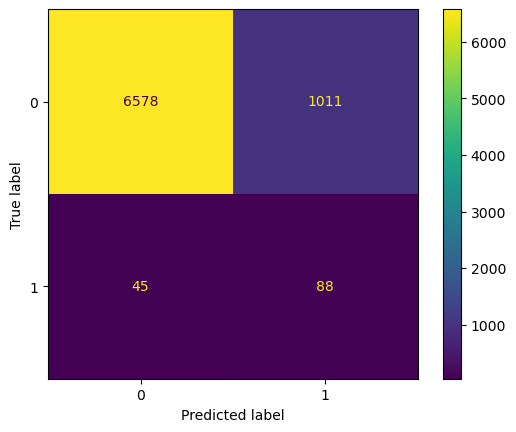

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_before)).plot();

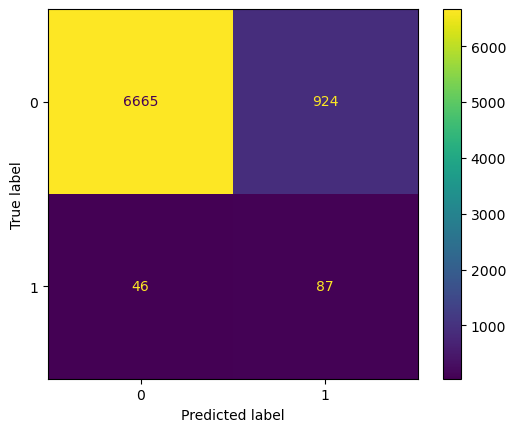

In [101]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_after)).plot();

In [154]:
print(classification_report(y_test, y_pred_before))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      7589
           1       0.08      0.66      0.14       133

    accuracy                           0.86      7722
   macro avg       0.54      0.76      0.53      7722
weighted avg       0.98      0.86      0.91      7722



In [102]:
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7589
           1       0.09      0.65      0.15       133

    accuracy                           0.87      7722
   macro avg       0.54      0.77      0.54      7722
weighted avg       0.98      0.87      0.92      7722



When looking through the results from confusion matrix and classification report, there are not that many difference between model before tuning and after tuning. The number of False Negative increased by 1, but after tuning model are able to reduce more False Positive than the increase of False Negative.

### **Feature Importance**

Now, we will see which features are important for the model

In [103]:
model['modeling'].feature_importances_

array([0.02099726, 0.00942072, 0.27014338, 0.0798174 , 0.00064619,
       0.07540374, 0.        , 0.05825388, 0.0221666 , 0.        ,
       0.00092275, 0.01527013, 0.02398709, 0.04663389, 0.07888579,
       0.0309346 , 0.06477085, 0.00077496, 0.00491723, 0.05422174,
       0.09414369, 0.00244597, 0.04524213])

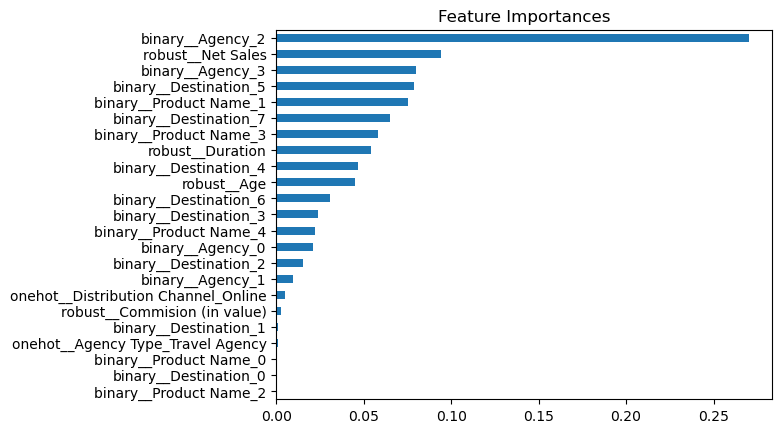

In [104]:
coef1 = pd.Series(model['modeling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=True)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Binary Results for Agency
- 1: 0001 = EPX
- 2: 0010 = CWT
- 3: 0011 = LWC
- 4: 0100 = SSI
- 5: 0101 = JZI
- 6: 0110 = KML
- 7: 0111 = C2B
- 8: 1000 = TST
- 9: 1001 = RAB
- 10: 1010 = ART
- 11: 1011 = CCR
- 12: 1100 = CBH
- 13: 1101 = CSR
- 14: 1110 = TTW
- 15: 1111 = ADM

Binary Results for Product Name
- 1: 00001 = 2 way Comprehensive Plan
- 2: 00010 = Cancellation Plan
- 3: 00011 = 1 way Comprehensive Plan
- 4: 00100 = Rental Vehicle Excess Insurance
- 5: 00101 = Single Trip Travel Protect Gold
- 6: 00110 = Ticket Protector
- 7: 00111 = Basic Plan
- 8: 01000 = Premier Plan
- 9: 01001 = Bronze Plan
- 10: 01010 = Annual Silver Plan
- 11: 01011 = Silver Plan
- 12: 01100 = Annual Travel Protect Silver
- 13: 01101 = Travel Cruise Protect
- 14: 01110 = Value Plan
- 15: 01111 = 24 Protect
- 16: 10000 = Single Trip Travel Protect Silver
- 17: 10001 = Comprehensive Plan
- 18: 10010 = Single Trip Travel Protect Platinum
- 19: 10011 = Gold Plan
- 20: 10100 = Annual Gold Plan
- 21: 10101 = Annual Travel Protect Platinum
- 22: 10110 = Individual Comprehensive Plan
- 23: 10111 = Annual Travel Protect Gold
- 24: 11000 = Spouse or Parents Comprehensive Plan
- 25: 11001 = Child Comprehensive Plan
- 26: 11010 = Travel Cruise Protect Family

### **SHAP**

In [180]:
import shap

 97%|=================== | 30059/30885 [00:36<00:00]       

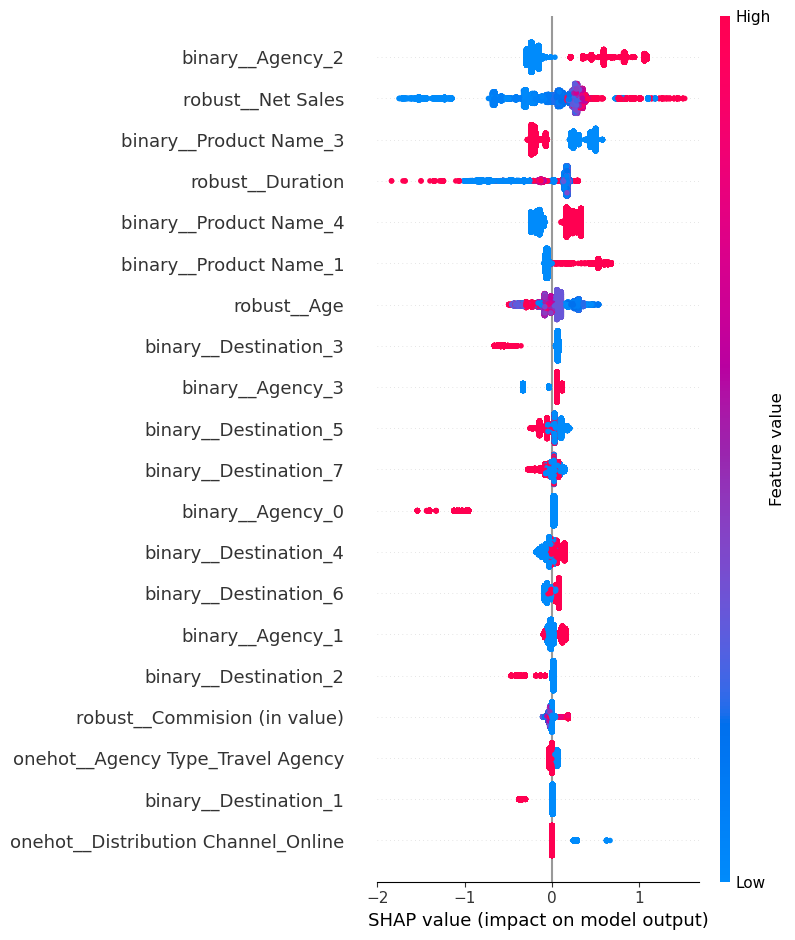

In [181]:
# define explainer
explainer = shap.TreeExplainer(
    model['modeling'],
    data = pd.DataFrame(model['preprocessing'].fit_transform(X_train), columns=model['preprocessing'].get_feature_names_out())
)

# shap values for each train set rows
shap_values = explainer.shap_values(model['preprocessing'].fit_transform(X_train))

# plot
shap.summary_plot(shap_values, model['preprocessing'].fit_transform(X_train), feature_names = model['preprocessing'].get_feature_names_out())

Based on the feature importance and SHAP graph above, one of the most importance feature for our model is the `Agency` feature which explains the agency name.

This means, knowing which `Agency` issues the insurance will reflects on the likelihood where customer may claims the insurance. In the case for our model, Since binary_Agency_2 and binary_Agency_3 has higher importance, Agency with a value of 1 in third and fourth digit is more important than others, such as EPX, CWT, LWC, and C2B. But, there might be an interaction between other agency for this results.

Second most important feature is `Net Sales` feature that explains the amount of sales that the travel insurance company receives. This corresponds to our data analysis before that the higher amount of `Net Sales` then the more likely the customer issues a claim. The SHAP graph also shows that the higher amount of `Net Sales` contributes to higher chance a customer will claim their insurance.

For the `Product Name` feature, Product with a value of 1 in second and 0 value in fourth digit is more likely for a customer to issues a claim. According this, Premier Plan, Bronze Plan, Annual Travel Protect Silver, and Travel Cruise Protect has higher chance for customer to issues a claim than other products.

For `Destination` feature, the value of 0 in sixth and eighth digit is more important in determining customer to claims than others. But, there will also be an interaction with others, since the other digit still has some importance.

`Duration` feature shows that travel with lower number of day poses lower risk and lower chance of a customer to issue a claim. While a longer duration has more risk as the SHAP graph shows, a very long duration travel has a lower chance of a customer to issue a claim.

`Age` feature shows that lower age has more chance for customer to issue a claim than customer with higher age. This might be caused by customer with lower age tend to be more busy and has higher chance to cancel the trip because of a force majeure.

`Distribution Channel`, `Commission (in value)`, and `Agency Type` doesn't really have an impact for the model. In the following improvement for the model, we can remove those feature without affecting the result of the model prediction.

## **Conclusion & Recommendation**

In [105]:
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7589
           1       0.09      0.65      0.15       133

    accuracy                           0.87      7722
   macro avg       0.54      0.77      0.54      7722
weighted avg       0.98      0.87      0.92      7722



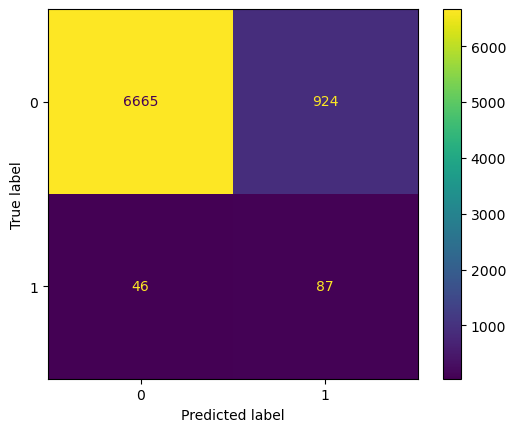

In [106]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_after)).plot();

### **Conclusion**

According to the results of our model classification report & confusion matrix, we can conclude that the model is able to predict 65% of customers who will claim insurance from all customers who will claim their insurance. The model is also able to predict 88% of customers who will not claim insurance from all customers who doesn't claim their insurance.

For this notebook, we will be assuming the price for insurance cost according to [Travel Insurance Cost](https://www.marketwatch.com/guides/insurance-services/travel-insurance-cost/). Therefore, assuming the cost for paying out the insurance claims is the total cost of the trips and the price for a standard travel insurance policy is 5% of the total cost of the trips, the business calculation will be the following:

- Standard Travel Insurance Policy Price = $ 221
- Cost of paying out Insurance Claims = $ 4,220

In case for the business to run **without models** (All of the customers will be accepted):
- Total Profit from customer paying for the insurance = Total customer accepted for insurance x Standard Insurance Policy Price 
                                                      = (7589 + 133) x 221 USD 
                                                      = 1,706,562 USD

- Total Loss of Profit because of customer claims their insurance = Total customer who claims insurance x Cost of paying out Insurance Claims
                                                                  = 133 * 4220 USD 
                                                                  = 561,260 USD

- Total Profit gained by the company = 1,706,562 USD - 561,260 USD = 1,145,302 USD

In case for the business to run **with our models** :
- Total Profit from customer paying for the insurance = Total customer accepted for insurance x Standard Insurance Policy Price 
                                                      = (6665 + 46) x 221 USD 
                                                      = 1,483,131 USD

- Total Loss of Profit because of customer claims their insurance = Total customer who claims insurance x Cost of paying out Insurance Claims
                                                                  = 46 * 4,220 USD 
                                                                  = 194,120 USD

- Total Profit gained by the company = 1,483,131 USD - 194,120 USD = 1,289,011 USD

**Therefore, after using our model, the company is able to earn 143,709 USD more, or 12.55% more than without using the model.**

The reason why we choose profit as a basis for successful model, as mentioned in the problem statement above, is because focusing solely on reducing the loss of profit from the insurance claims will also reduce our profit as the criterion for the customer who wants to use our services will be too tight and we will be losing profit because we lose a lot of low-risk customer.

According to the feature importance, `Agency`, `Net Sales`, `Destination`, and `Product Name` is an important feature for the model to predict if the customer will issue a claim or not. While `Distribution Channel`, `Commission (in value)`, and `Agency Type` is the least important and are able to be removed in the following improvement for the model.

### **Recommendation**

For Business :

1. Perform an audit on EPX, CWT, LWC, and C2B agencies to see if their customer risk assessment is up to company standard or not. Because most of the claims comes from their agency which might be a result of underperformed risk assessment.

2. We can make a new strategy to map out customer risk out of their travel `Duration`, where a longer trip will pose higher risk, customer `Age` whereas if they are at younger working age (20 - 40) the risk will also be higher than other range of age, and also their travel `Destination` if they are going to one of the list in `Destination` with higher risk. After mapping out the customer, we can group them into low-risk customer and high-risk customer, where the amount of premium for the insurance will be based on their risk.

3. We can also made an improvement for insurance plan, especially for plan with the `Product Name`: Premier Plan, Bronze Plan, Annual Travel Protect Silver, and Travel Cruise Protect. We can investigate further what is included within the plan and find the similarity where customer are likely to issue a claim. If the common thread is found, we can make a new insurance plan that have appropriate premium for the risk.

For Model Improvement :

The result for our models is still far from good, especially because an insurance claim data is a very imbalanced data where a customer who claims insurance is a rare occurence than the rest of the data, therefore we need to have improvements as the following:

1. Adding more relevant feature toward the target (`Claim`) such as, have they ever claim an insurance before not, why they claimed their insurance before, and the reason for their travel, will help to assess the risk of each customer and will help the model to predict customer with more risk.

2. Try to use other machine learning algorithm that has not been tried yet and broaden the parameter for hyperparameter tuning and use gridsearch method in order to find the most optimal model.

3. Using OrdinalScaler method for `Product Name` feature after knowing the order of each plan, because if only using this data for now, there is no way to know which plan is higher than the others. Knowing this will results in making better prediction result.

4. If possible, increase more rows of data where the customer claims the insurance in order to have the model learns more about the pattern when customer issues a claim in order for the model to predict better.

## **Save Model**

In [182]:
import pickle

In [183]:
randomsearch_grad.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('robust', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age'])])),
                ('resampling', SMOTE(random_state=0)),
                ('modeling',
                 GradientBoostingClassifier(max_depth=2, min_samples_leaf=57,
                                            min_samples_split=7,
                                            n_estimators=140,
                                            random_state=0))])

In [186]:
# best model
grad_tuning = randomsearch_grad.best_estimator_

grad_tuning.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('robust', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age'])])),
                ('resampling', SMOTE(random_state=0)),
                ('modeling',
                 GradientBoostingClassifier(max_depth=2, min_samples_leaf=57,
                                            min_samples_split=7,
                                            n_estimators=140,
                                            random_state=0))])

In [187]:
pickle.dump(grad_tuning, open('model_gradboost_travel.sav', 'wb'))

In [188]:
# load model

model_loaded = pickle.load(open('model_gradboost_travel.sav', 'rb'))
model_loaded

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('robust', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age'])])),
                ('resampling', SMOTE(random_state=0)),
                ('modeling',
                 GradientBoostingClassifier(max_depth=2, min_samples_leaf=57,
                                            min_samples_split=7,
                                            n_estimators=140,
                                            random_state=0))])

In [189]:
fbeta_score(y_test, model_loaded.predict(X_test), beta=2)

0.28191834089436163